<img src="assets/bricks.jpg">

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

In [3]:
color_df = pd.read_csv("data/colors.csv")
color_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [4]:
color_df.groupby("name").sum()

,id
name,
Aqua,118
Black,0
Blue,1
Blue-Violet,112
Bright Green,10
...,...
Violet,110
White,15
Yellow,14


In [5]:
color_df["name"].nunique()

135

The amount of transparent and nontransparent tiles

In [6]:
color_df.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28




<img src="https://i.imgur.com/aKcwkSx.png">


<img src="https://i.imgur.com/whB1olq.png"> 

Read the sets.csv data

In [7]:
sets = pd.read_csv("data/sets.csv")

In [8]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


Sort the dataset by year

In [10]:
sets.sort_values("year")

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
...,...,...,...,...,...
11289,75290-1,Mos Eisley Cantina,2020,158,0
5147,41430-1,Summer Fun Water Park,2020,494,1012
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


Checks how many sets lego released in their first year

In [11]:
sets[sets["year"] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


Finds the sets with the most parts

In [12]:
sets.sort_values("num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


Shows the number of sets released year by year

In [13]:
sets_by_year = sets.groupby("year").count()
sets_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


In [14]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


Shows the amount of lego sets produced per year

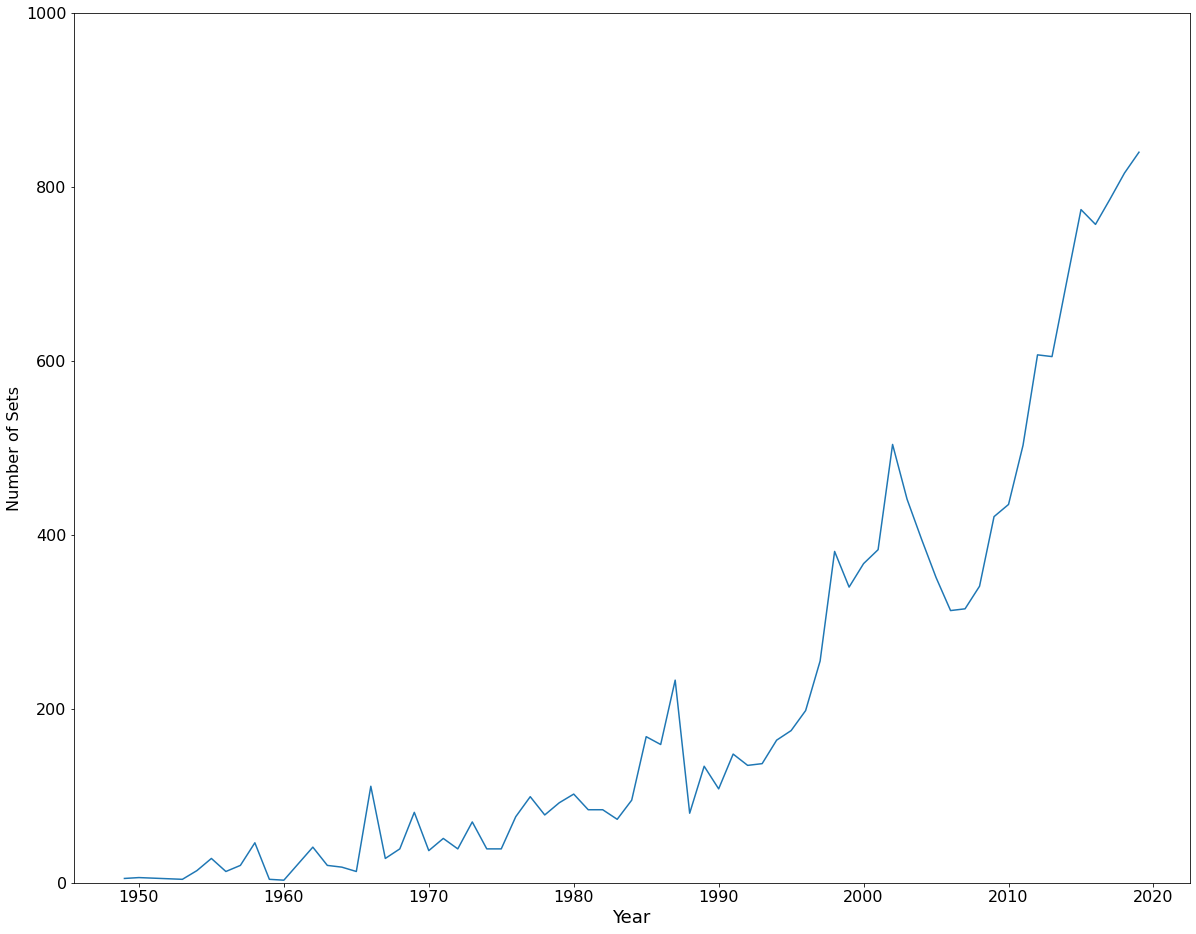

In [15]:
sets_by_year = sets_by_year[:-2]
plt.figure(figsize=(20,16))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Sets', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylim(0, 1000)
plt.plot(sets_by_year.index, sets_by_year.set_num)

# Number of different themes shipped per year

In [16]:
themes_by_year = sets.groupby("year").agg({"theme_id": pd.Series.nunique})
themes_by_year.tail()

,theme_id
year,
2017,89
2018,93
2019,78
2020,82
2021,1


In [17]:
themes_by_year.rename(columns={"theme_id": "nr_themes"}, inplace=True)
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


# The number of themes released per year vs the number of sets released per year

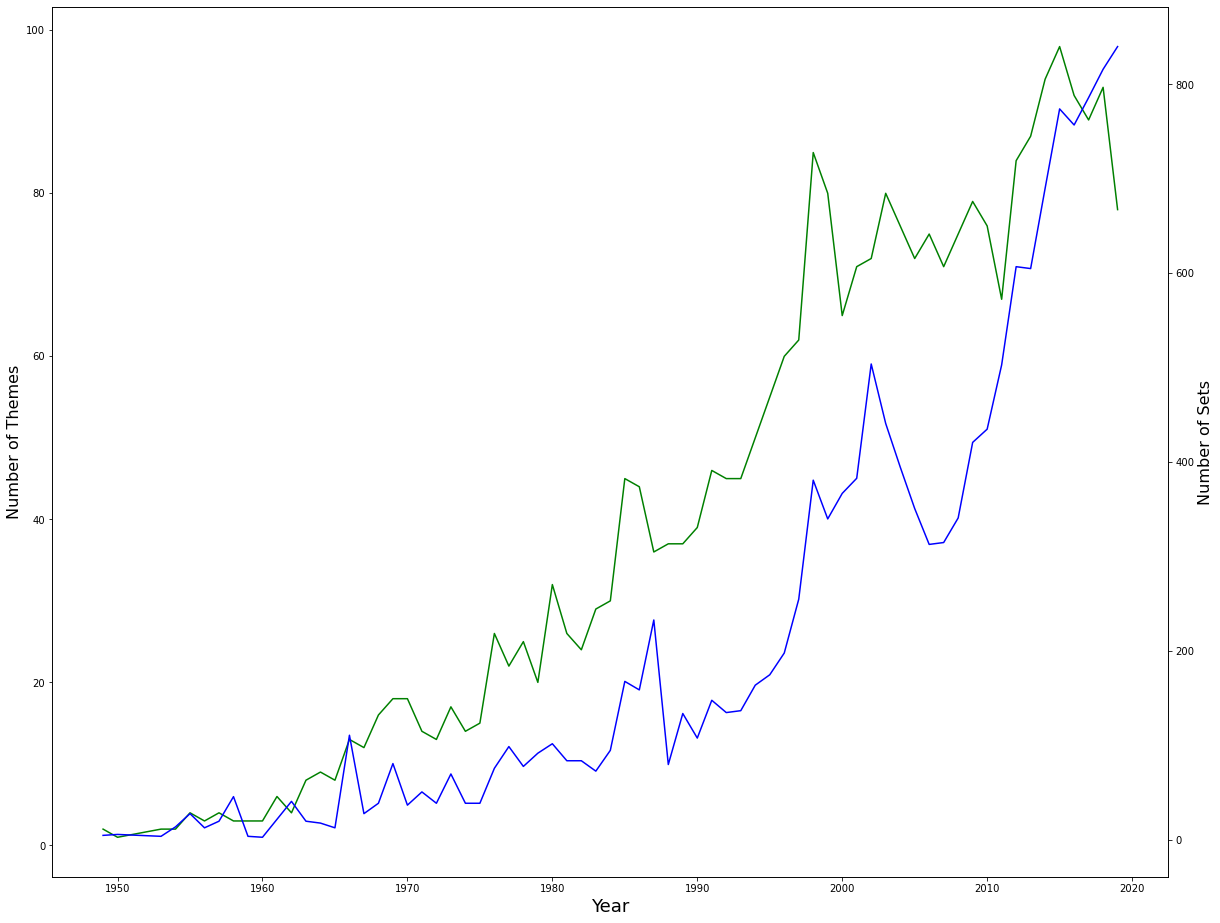

In [18]:
themes_by_year = themes_by_year[:-2]
plt.figure(figsize=(20,16))
ax1 = plt.gca()
ax2 = plt.twinx()
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Number of Themes', fontsize=16)
ax2.set_ylabel('Number of Sets', fontsize=16)
ax1.plot(themes_by_year.index, themes_by_year.nr_themes, color="green")
ax2.plot(sets_by_year.index, sets_by_year.set_num, color="blue")

### Scatter Plots in Matplotlib

Creates a scatter plot graph with the mean amount of lego parts per set per year

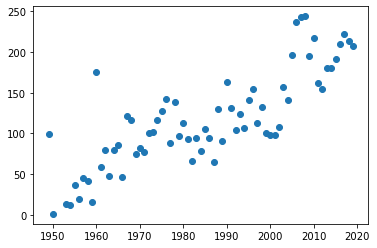

In [20]:
parts_per_set = sets.groupby("year").agg({"num_parts": pd.Series.mean})
parts_per_set = parts_per_set[:-2]
plt.scatter(parts_per_set.index, parts_per_set.num_parts)

### Number of Sets per LEGO Theme

Finds which lego theme has the highest amount of sets

In [21]:
set_theme_count = sets["theme_id"].value_counts()

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

In [22]:
themes = pd.read_csv("data/themes.csv")
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [1]:
# Finds the ID's of the themes with the name "Star Wars"

themes[themes["name"] == "Star Wars"].head()

NameError: name 'themes' is not defined

In [24]:
sets[sets.theme_id == 258 ]

,set_num,name,year,theme_id,num_parts
5865,4524081-1,Mindstorms NXT CD,2007,258,0
7157,51515-1,Robot Inventor,2020,258,0
15121,EV3MEG-1,EV3 MEG Mini,2013,258,31


In [25]:
set_theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [26]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

### Merging (i.e., Combining) DataFrames based on a Key


In [27]:
set_theme_count = pd.DataFrame({"id": set_theme_count.index,
                               "set_count": set_theme_count.values})

In [28]:
merged_df = pd.merge(set_theme_count, themes, on="id")
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

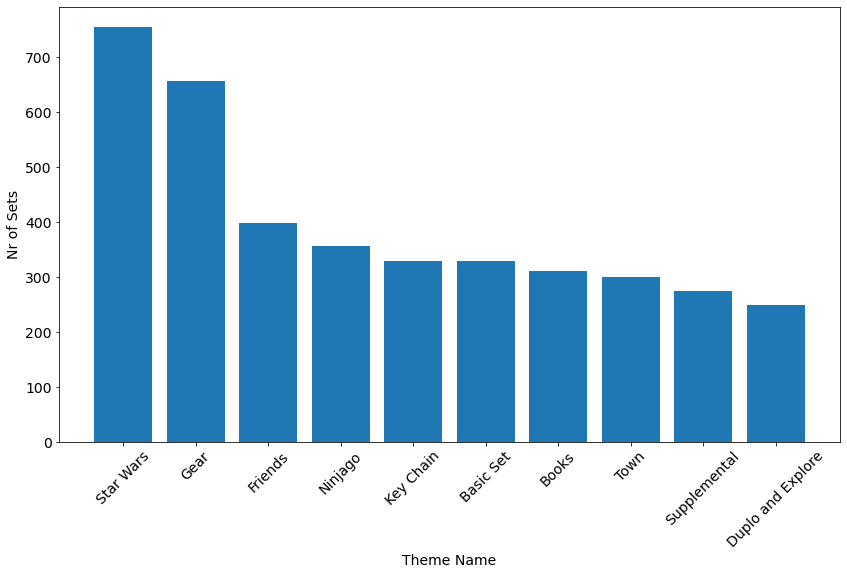

In [30]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])